In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import scipy.stats as stats  # for calculating confidence intervals
import math as math
import matplotlib.pyplot as plt
import random

In [2]:
# Simulation values

reps = 100
forecast_days = 30

In [3]:
# Fetching historical data

import yfinance as yf
import datetime as dt

start = dt.datetime(2022, 1, 1)
end = dt.datetime.now()

btc = yf.download('BTC-USD', start, end)
btc.tail(3)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-08,43505.136719,43903.019531,42183.289062,42287.664062,42287.664062,27215995394
2022-04-09,42282.078125,42786.816406,42183.253906,42782.136719,42782.136719,16050772496
2022-04-10,42746.378906,42873.136719,42644.234375,42828.886719,42828.886719,15113990144


In [4]:
# Creating a price list from Yahoo Finance's dataframe
btc_price = btc['Close'].tolist()
btc_price[0:3]

[47686.8125, 47345.21875, 46458.1171875]

In [5]:
def mc(p, d, p_std):
    f = []
    for k in range(d):
        p = float(p * (1 + np.random.normal(0, p_std, 1)))
        f.append(p)
        
    plt.plot(f)
    
    return f

In [6]:
# Monte Carlo Simulation

def monte(hist_price, num_days, num_reps):
    change = []
    for i in range(1, len(hist_price)):
        change.append((hist_price[i] - hist_price[i - 1])/hist_price[i - 1])
    
    price_std = np.std(change)
    #print(change)

    # Repetition
    day_vals = list(range(num_days))
    days = day_vals * num_reps
    prices = []
    
    for j in range(num_reps):
        
        # Taking the last historical price as initial value for monte carlo simulation
        price = hist_price[-1]
        
        # Calling monte carlo function 
        prices.extend(mc(price, num_days , price_std))
    
    print(len(prices))
    # Create a data frame
    df = pd.DataFrame({'Days': days, 'Price': prices})

    return df    

3000


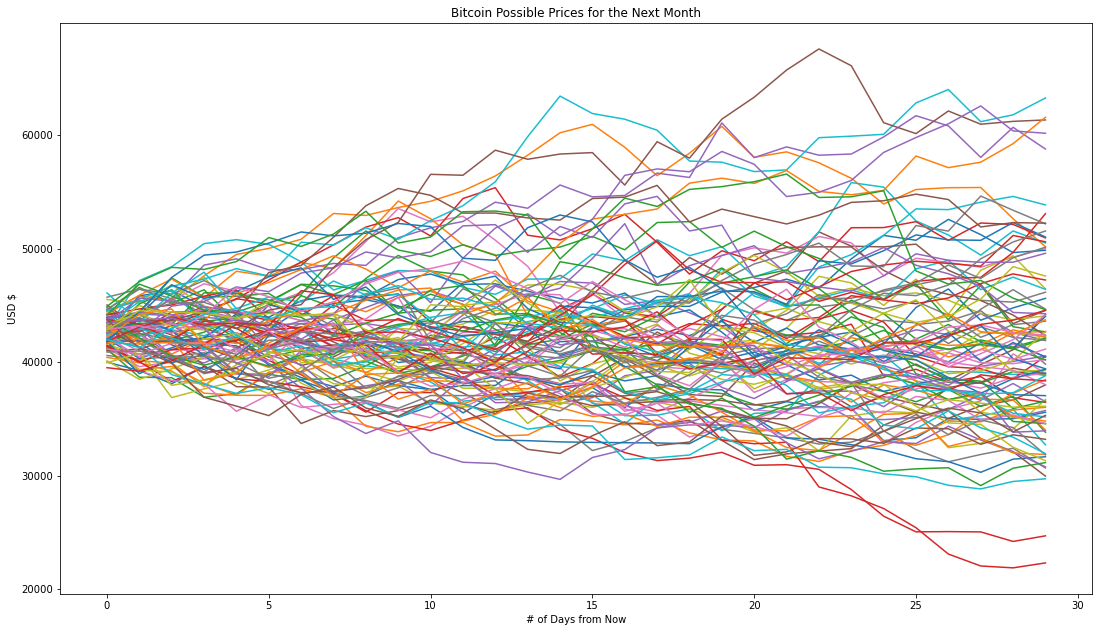

In [7]:
forecast = monte(btc_price, forecast_days, reps)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.title("Bitcoin Possible Prices for the Next Month")
plt.xlabel("# of Days from Now")
plt.ylabel("USD $")
plt.show()

In [8]:
forecast['Price'].mean()

42191.93559898758